In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv("https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv", parse_dates=['Date'])

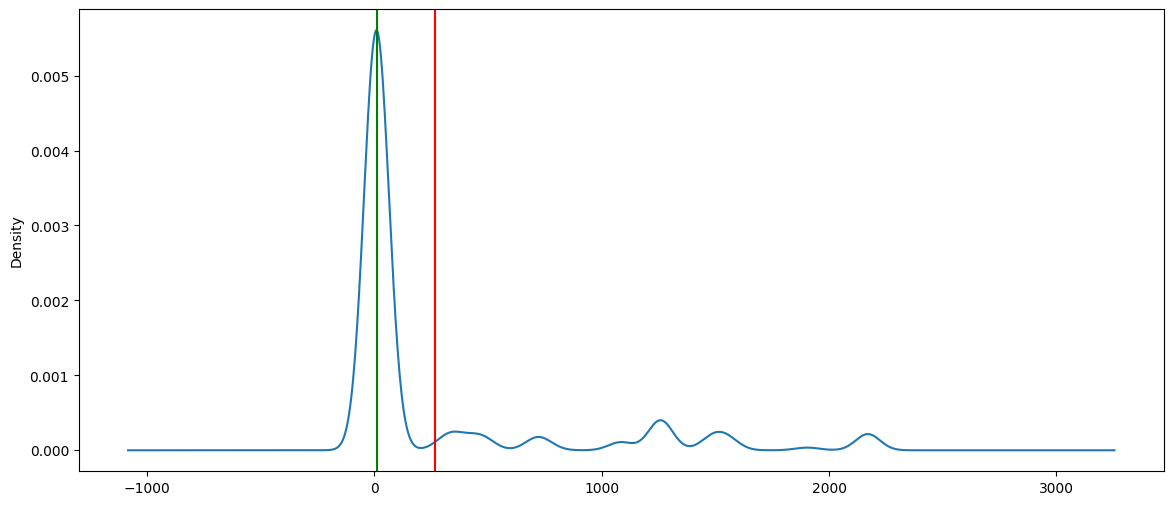

In [4]:
### Cost Structures
ax=sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) #kde
ax.axvline(sales['Unit_Cost'].mean(), color="red")
ax.axvline(sales['Unit_Cost'].median(), color="green")

In [5]:
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<Axes: >

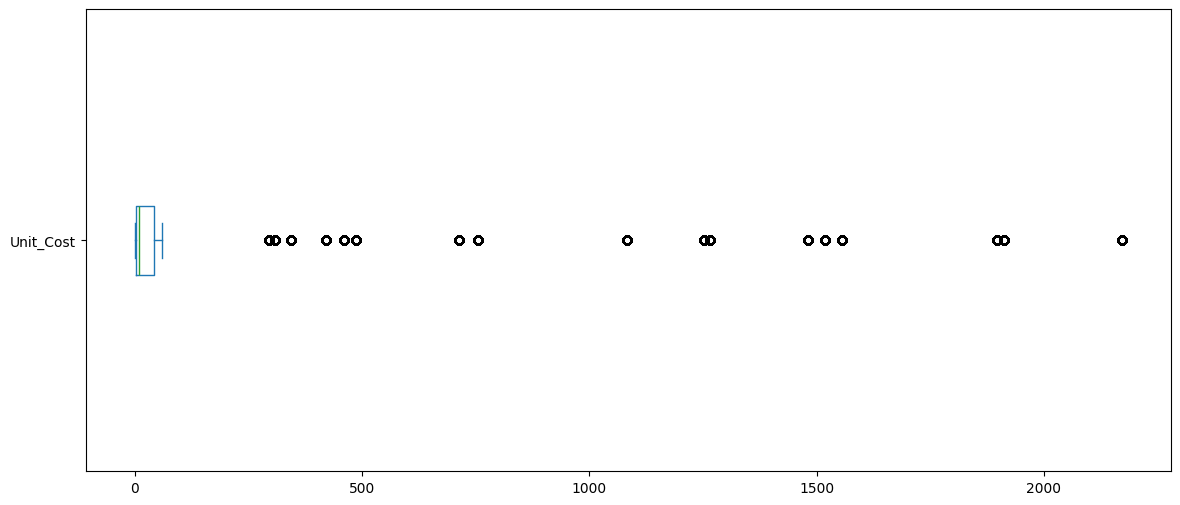

In [6]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

In [7]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [8]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

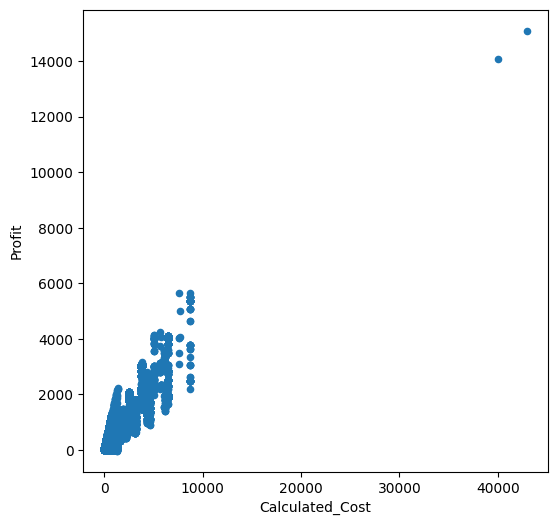

In [9]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

In [10]:
### consumer qualities
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<Axes: ylabel='Age_Group'>

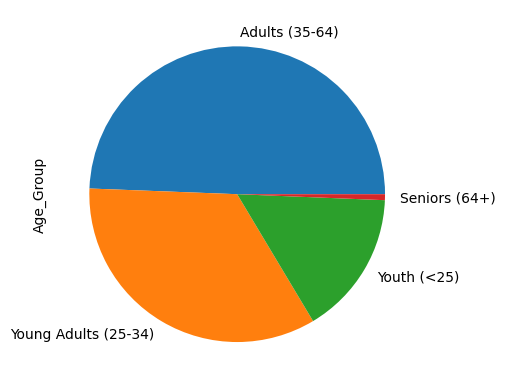

In [11]:
sales['Age_Group'].value_counts().plot(kind="pie")

In [13]:
corr=sales.corr()

/var/folders/78/lyg5vs3x05n9nf7j9ttzb0yc0000gn/T/ipykernel_88392/564467530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=sales.corr()


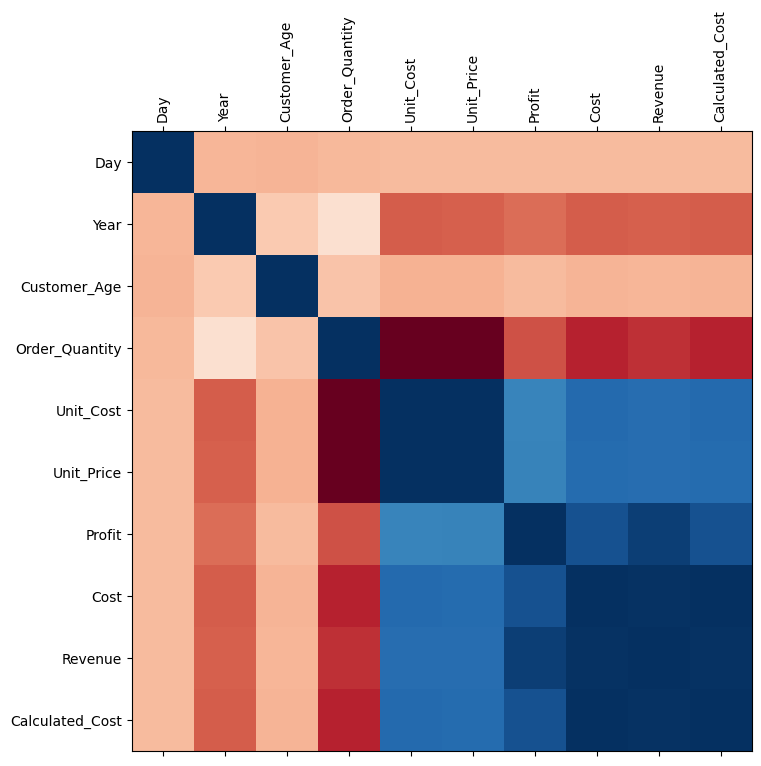

In [14]:
fig=plt.figure(figsize=(8,8))
plt.matshow(corr, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical");
plt.yticks(range(len(corr.columns)), corr.columns);

In [15]:
### linear regression
import statsmodels.api as sm

# Add a constant to the independent variable (intercept)
X = sm.add_constant(sales[['Unit_Price', 'Customer_Age', "Unit_Cost"]])

# Fit the linear regression model
model = sm.OLS(sales['Profit'], X).fit()

In [16]:
summary = model.summary()

In [17]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                 5.101e+04
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:54:22   Log-Likelihood:            -8.0354e+05
No. Observations:              113036   AIC:                         1.607e+06
Df Residuals:                  113032   BIC:                         1.607e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           88.6898      3.039     29.180   